<a href="https://colab.research.google.com/github/edvinhysenagolli/Eniac-Discounts/blob/main/Eniac_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Cleaning** and **Data Visualization**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# load data
# This code is made to load our data stored on Google Drive
def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"

csv_names = ['products', 'orders', 'orderlines', 'brands']

# Google Drive file ids


files_id = {
    'products':"1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU",
    'orders':"1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ",
    'orderlines':"1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG",
    'brands':"1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD"
}

# Read data from Google Drive
products = pd.read_csv(gd_path(files_id['products']), sep=",")
orders = pd.read_csv(gd_path(files_id['orders']), sep=",")
orderlines = pd.read_csv(gd_path(files_id['orderlines']), sep=",")
brands = pd.read_csv(gd_path(files_id['brands']), sep=",")

In [ ]:
# Form Pandas display format
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Brands

**brands.csv**

* `short` - the 3-character code by which the brand can be identified in the
first 3 characters of products.sku

* `long` - full name of the brand

In [ ]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [ ]:
brands.duplicated().sum()

0

# Products

* `sku` -> stock keeping unit: a unique identifier for each product
* `name`-> product name
* `desc` -> product description
* `in_stock` -> whether or not the product was in stock at the moment of the data extraction
* `type` -> a numerical code for product type

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


### Checking info for products


*   Duplicates (droping)
*   Missing values







In [ ]:
products.duplicated().sum()

8746

In [ ]:
#droping duplicates
products = products.drop_duplicates()

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10580 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10580 non-null  object
 1   name         10580 non-null  object
 2   desc         10573 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10580 non-null  object
 5   in_stock     10580 non-null  int64 
 6   type         10530 non-null  object
dtypes: int64(1), object(6)
memory usage: 661.2+ KB


In [ ]:
# there some missing values

products["desc"].isna().sum()

products.loc[products['desc'].isna(), :]

,sku,name,desc,price,promo_price,in_stock,type
16126,WDT0211-A,"Open - Purple 2TB WD 35 ""PC Security Mac hard ...",NaN,107,814.659,0,1298
16128,APP1622-A,Open - Apple Smart Keyboard Pro Keyboard Folio...,NaN,1.568.206,1.568.206,0,1298
17843,PAC2334,Synology DS718 + NAS Server | 10GB RAM,NaN,566.35,5.659.896,0,12175397
18152,KAN0034-A,Open - Kanex USB-C Gigabit Ethernet Adapter Ma...,NaN,29.99,237.925,0,1298
18490,HTE0025,Hyper Pearl 1600mAh battery Mini USB Mirror an...,NaN,24.99,22.99,1,1515
18612,OTT0200,OtterBox External Battery Power Pack 20000 mAHr,NaN,79.99,56.99,1,1515
18690,HOW0001-A,Open - Honeywell thermostat Lyric zonificador ...,NaN,199.99,1.441.174,0,11905404


In [ ]:
products = products.dropna(subset=['desc'])


In [ ]:
products = products.dropna(subset=['price'])

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10527 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10527 non-null  object
 1   name         10527 non-null  object
 2   desc         10527 non-null  object
 3   price        10527 non-null  object
 4   promo_price  10527 non-null  object
 5   in_stock     10527 non-null  int64 
 6   type         10477 non-null  object
dtypes: int64(1), object(6)
memory usage: 657.9+ KB


###`Price` analysis

In [ ]:
products[['name', 'price', 'promo_price']].sample(5)

,name,price,promo_price
10483,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB R...",4849,35.129.906
17032,OWC USB Dock-C 10-port power 80W Rose Gold,217.99,1.799.899
3129,Case Apple iPhone 6 Plus / 6s Plus Silicone Ca...,45,449.999
2808,OtterBox Strada Leather Folio Case Black iPhone 6,49.99,329.894
2719,Western Digital My Passport Ultra 3TB hard dri...,149.99,1.269.895


In [ ]:
price_problems_number = products.loc[(products.price.astype(str).str.contains("\d+\.\d+\.\d+"))|(products.price.astype(str).str.contains("\d+\.\d{3,}")), :].shape[0]
price_problems_number

541

In [ ]:
print(f"The column price has in total {price_problems_number} wrong values. This is {round(((price_problems_number / products.shape[0]) * 100), 2)}% of the rows of the DataFrame")

# going to drop these rows as to not affect the results later on

The column price has in total 541 wrong values. This is 5.14% of the rows of the DataFrame


In [ ]:
products = products.loc[(~products.price.astype(str).str.contains("\d+\.\d+\.\d+"))&(~products.price.astype(str).str.contains("\d+\.\d{3,}")), :]

In [ ]:
products.sample(5)

,sku,name,desc,price,promo_price,in_stock,type
2272,TIG0024,Tigra iPhone Bike Stand + Case 8/7 / 6s / 6,Waterproof Case for iPhone 6 bicycle stand.,39.99,349.896,0,11865403
13639,BEL0286,Belkin ScreenForce Tempered Glass Protector iP...,Screensaver tempered glass 0.33mm thick hardne...,19.99,169.896,1,13555403
10858,OTT0102,OtterBox iPhone Case My Symmetry 6 / 6s Transp...,Protective housing with rear transparent and c...,29.99,169.896,0,11865403
1603,TUC0197,Filo Tucano Folio iPad Air 2 Dorado,"rigid collapsible, stylish case with flashes o...",39.99,349.896,0,12635403
14703,PAC1764,QNAP TS-431P NAS,NAS with 16TB capacity Seagate Hard Drives for...,1021.95,6.913.686,0,12175397


In [ ]:
# checking
price_problems_number

541

In [ ]:
products["price"] = pd.to_numeric(products["price"])  #converting to float

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9986 non-null   object 
 1   name         9986 non-null   object 
 2   desc         9986 non-null   object 
 3   price        9986 non-null   float64
 4   promo_price  9986 non-null   object 
 5   in_stock     9986 non-null   int64  
 6   type         9940 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 624.1+ KB


###`promo_price`

In [ ]:
promo_problems_number = products.loc[(products.promo_price.astype(str).str.contains("\d+\.\d+\.\d+"))|(products.promo_price.astype(str).str.contains("\d+\.\d{3,}")), :].shape[0]
promo_problems_number

9228

In [ ]:
# this is more than we expected, more than 90% of the data, the column is corrupted, we exclude it.

In [ ]:
products_cl = products.drop(columns=["promo_price"])

In [ ]:
products_cl.info() #.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 19325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9986 non-null   object 
 1   name      9986 non-null   object 
 2   desc      9986 non-null   object 
 3   price     9986 non-null   float64
 4   in_stock  9986 non-null   int64  
 5   type      9940 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 546.1+ KB


# Orders

**orders.csv** – Every row in this file represents an order.
* `order_id` – a unique identifier for each order
* `created_date` – a timestamp for when the order was created
* `total_paid` – the total amount paid by the customer for this order, in euros

* `state`
 * “Shopping basket” – products have been placed in the shopping basket, but the order has not been processed yet.
 * “Pending” – the shopping basket has been processed, but payment confirmation is pending.
 * “Completed” – the order has been placed and paid, and the transaction is completed.
 * “Cancelled” – the order has been cancelled and the payment returned to the
customer.

In [ ]:
orders.sample(5)

,order_id,created_date,total_paid,state
135903,435595,2017-11-23 19:59:44,258.09,Completed
50804,350299,2017-04-27 12:06:40,50.97,Completed
51788,351283,2017-04-30 14:24:48,48.04,Shopping Basket
97434,397017,2017-09-06 11:01:33,229.99,Place Order
146357,446452,2017-11-26 23:07:09,29.48,Completed


In [ ]:
orders.duplicated().sum()

0

In [ ]:
orders.nunique()

order_id        226909
created_date    224828
total_paid       31236
state                5
dtype: int64

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


`total_paid` has 5 missing values

In [ ]:
print(f"5 missing values represents {((orders.total_paid.isna().sum() / orders.shape[0])*100).round(5)}% of the rows in our DataFrame")

5 missing values represents 0.0022% of the rows in our DataFrame


In [ ]:
orders = orders.loc[~orders.total_paid.isna(), :]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226904 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226904 non-null  int64  
 1   created_date  226904 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226904 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 8.7+ MB


`created_date` to be converted in datetime

In [ ]:
orders['created_date'] = pd.to_datetime(orders['created_date'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226904 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226904 non-null  int64         
 1   created_date  226904 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226904 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.7+ MB


In [ ]:
orders.state.value_counts()

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: state, dtype: int64

# Orderlines

**orderlines.csv** – Every row represents each one of the different products involved in an order.
* `id` – a unique identifier for each row in this file
* `id_order` – corresponds to orders.order_id
* `product_id` – an old identifier for each product, nowadays not in use
* `product_quantity` – how many units of that product were purchased on that order
* `sku` – stock keeping unit: a unique identifier for each product
* `unit_price` – the unitary price (in euros) of each product at the moment of placing that order
date
* `date` – for the processing of that product

In [ ]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [ ]:
orderlines.duplicated().sum()

0

In [ ]:
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [ ]:
orderlines['unit_price'].sample(5)

188966     59.99
231715      9.99
215653    375.25
48106     284.99
36561      64.99
Name: unit_price, dtype: object

In [ ]:
orderlines.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()

False    257814
True      36169
Name: unit_price, dtype: int64

In [ ]:
two_dot_order_ids_list = orderlines.loc[orderlines.unit_price.str.contains("\d+\.\d+\.\d+"), "id_order"]
orderlines = orderlines.loc[~orderlines.id_order.isin(two_dot_order_ids_list)]

In [ ]:
orderlines["unit_price"] = pd.to_numeric(orderlines["unit_price"])

In [ ]:
orderlines.id_order.nunique()

170213

In [ ]:
orders.order_id.nunique()

226904

In [ ]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216250 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                216250 non-null  int64         
 1   id_order          216250 non-null  int64         
 2   product_id        216250 non-null  int64         
 3   product_quantity  216250 non-null  int64         
 4   sku               216250 non-null  object        
 5   unit_price        216250 non-null  float64       
 6   date              216250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 13.2+ MB


# Data Quality

In [ ]:
orders.state.value_counts()

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: state, dtype: int64

## Keeping only the completed orders(fully purchased ones)

In [ ]:
(
  orders[orders.state == "Completed"]
  .merge(
      orderlines,
      how = "inner",
      left_on = "order_id",
      right_on ="id_order"
        )
)

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20
1,242832,2017-12-31 17:40:03,15.76,Completed,1529178,242832,0,1,PAR0074,10.77,2017-12-31 17:26:40
2,243330,2017-02-16 10:59:38,84.98,Completed,1181923,243330,0,1,OWC0074,77.99,2017-02-15 17:07:44
3,245275,2017-06-28 11:35:37,149.00,Completed,1276706,245275,0,1,TAD0007,149.00,2017-06-28 11:12:30
4,245595,2017-01-21 12:52:47,112.97,Completed,1154394,245595,0,2,PAC1561,52.99,2017-01-21 12:49:00
...,...,...,...,...,...,...,...,...,...,...,...
56709,527042,2018-03-14 11:47:50,18.98,Completed,1649446,527042,0,1,APP0927,13.99,2018-03-14 11:42:38
56710,527070,2018-03-14 11:50:48,24.97,Completed,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
56711,527074,2018-03-14 11:51:42,24.97,Completed,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
56712,527096,2018-03-14 11:58:40,34.96,Completed,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [ ]:
actual_purchases_df = orders.copy()

actual_purchases_df.state.value_counts()

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: state, dtype: int64

In [ ]:
actual_purchases_df = actual_purchases_df.loc[actual_purchases_df['state'].isin(["Completed"]), :]

In [ ]:
actual_purchases_list = list(actual_purchases_df["order_id"])
actual_purchases_list

In [ ]:
orderlines.loc[~ orderlines.id_order.isin(actual_purchases_list)]

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [ ]:
orders_qu = orders.loc[orders["order_id"].isin(actual_purchases_df["order_id"]), :].copy()

In [ ]:
orderlines_qu = orderlines.loc[orderlines["id_order"].isin(actual_purchases_list), :].copy()

In [ ]:
len(orders_qu.order_id.unique())

46605

In [ ]:
len(orderlines_qu.id_order.unique())

43064

In [ ]:
orders_qu.loc[~orders_qu.order_id.isin(orderlines_qu.id_order.unique())]

,order_id,created_date,total_paid,state
8,245941,2017-01-01 10:32:23,183.52,Completed
31,257847,2017-11-23 23:46:54,1367.11,Completed
35,258985,2017-07-31 12:52:38,2264.60,Completed
40,259668,2017-10-06 22:06:58,1132.33,Completed
46,262016,2017-08-18 01:05:38,3109.57,Completed
...,...,...,...,...
225865,526357,2018-03-13 12:01:26,1405.99,Completed
225887,526380,2018-03-13 12:16:06,1436.99,Completed
226012,526505,2018-03-13 15:56:14,1421.99,Completed
226014,526507,2018-03-13 16:04:20,1137.97,Completed


In [ ]:
orderlines_qu.loc[~orderlines_qu.id_order.isin(orders_qu.order_id.unique())]

,id,id_order,product_id,product_quantity,sku,unit_price,date


## Merging to fix the difference

In [ ]:
orders_lines_merged_df = orders_qu.merge(orderlines_qu, how="inner", left_on="order_id", right_on="id_order")

orders_lines_merged_df.head(5)

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20
1,242832,2017-12-31 17:40:03,15.76,Completed,1529178,242832,0,1,PAR0074,10.77,2017-12-31 17:26:40
2,243330,2017-02-16 10:59:38,84.98,Completed,1181923,243330,0,1,OWC0074,77.99,2017-02-15 17:07:44
3,245275,2017-06-28 11:35:37,149.00,Completed,1276706,245275,0,1,TAD0007,149.00,2017-06-28 11:12:30
4,245595,2017-01-21 12:52:47,112.97,Completed,1154394,245595,0,2,PAC1561,52.99,2017-01-21 12:49:00


In [ ]:
o_ids_in_both_list = list(orders_lines_merged_df["order_id"].unique())

In [ ]:
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(o_ids_in_both_list), :]
orderlines_qu = orderlines_qu.loc[orderlines_qu["id_order"].isin(o_ids_in_both_list), :]

print(f"orders_qu {orders_qu.shape[0]} orderlines_qu {orderlines_qu.shape[0]}")

orders_qu 43064 orderlines_qu 56714


In [ ]:
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(43064, 43064)

In [ ]:
orders_order_ids = orders["order_id"]
orderlines = orderlines[orderlines["id_order"].isin(orders_order_ids)]
orderlines


orderlines_order_ids = orderlines["id_order"]
orders = orders[orders["order_id"].isin(orderlines_order_ids)]

## Revenues from different tables (Exploring the revenues)

In [ ]:
orderlines_copy = orderlines_qu.copy()
orderlines_copy.head(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34


In [ ]:
# total_unit_price, as a product of quantity and unit_price

orderlines_copy['total_unit_price'] = orderlines_copy['unit_price'] * orderlines_copy['product_quantity']

orderlines_copy.sample(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_unit_price
126086,1369387,408259,0,1,APP0697,6.99,2017-10-04 10:09:13,6.99
182855,1470126,452727,0,1,CRU0038-2,467.99,2017-11-30 16:42:03,467.99
92643,1296429,379214,0,1,STA0042,29.99,2017-07-18 21:12:21,29.99


In [ ]:
# (sum)total_unit_price grouped by id_order
orderlines_group_order_df = orderlines_copy.groupby("id_order", as_index=False)["total_unit_price"].sum()
orderlines_group_order_df

,id_order,total_unit_price
0,241423,129.16
1,242832,10.77
2,243330,77.99
3,245275,149.00
4,245595,105.98
...,...,...
43059,527042,13.99
43060,527070,19.98
43061,527074,19.98
43062,527096,29.97


In [ ]:
# orders table have total_paid
# orderlines table have now total_unit_price

# let's check the difference

orders_copy = orders_qu.copy()

In [ ]:
diff_df = orders_copy.merge(

    orderlines_copy,
    how = "inner",
    left_on = "order_id",
    right_on = "id_order"
)

diff_df.head(2)

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,total_unit_price
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,1529178,242832,0,1,PAR0074,10.77,2017-12-31 17:26:40,10.77


In [ ]:
diff_df['difference'] = diff_df['total_paid'] - diff_df['total_unit_price']

diff_df.head(3)

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,total_unit_price,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,1529178,242832,0,1,PAR0074,10.77,2017-12-31 17:26:40,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,1181923,243330,0,1,OWC0074,77.99,2017-02-15 17:07:44,77.99,6.99


In [ ]:
diff_df.difference.mean().round(2)

79.79

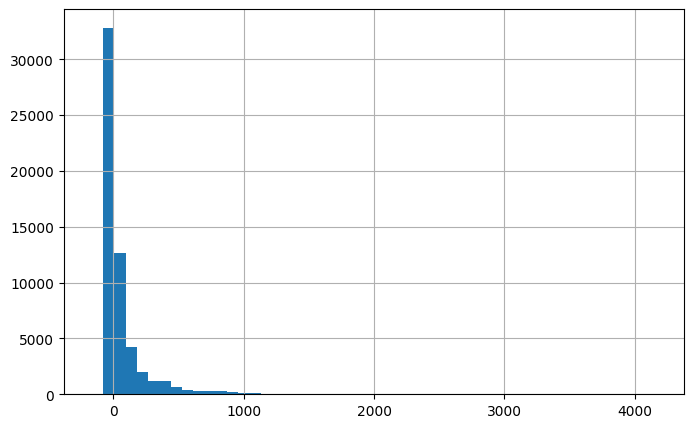

In [ ]:
diff_df.difference.hist(bins= 50, figsize=(8,5));

In [ ]:
diff_df.difference.describe()

count   56714.00
mean       79.79
std       192.53
min      -165.00
25%         3.99
50%         6.99
75%        59.99
max      4157.88
Name: difference, dtype: float64

In [ ]:
diff_df.loc[diff_df.difference > 30, ]

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,total_unit_price,difference
5,246018,2017-02-13 23:02:57,211.95,Completed,1179702,246018,0,1,IFX0055,93.99,2017-02-13 22:34:47,93.99,117.96
6,246018,2017-02-13 23:02:57,211.95,Completed,1179711,246018,0,1,TUC0308,24.99,2017-02-13 22:39:20,24.99,186.96
7,246018,2017-02-13 23:02:57,211.95,Completed,1179733,246018,0,1,IFX0020,7.99,2017-02-13 23:00:00,7.99,203.96
8,246018,2017-02-13 23:02:57,211.95,Completed,1180035,246018,0,1,MOP0089,79.99,2017-02-14 10:38:35,79.99,131.96
9,246405,2017-11-24 10:01:27,407.96,Completed,1434161,246405,0,1,CRU0051,121.91,2017-11-24 09:40:44,121.91,286.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56639,526529,2018-03-13 16:56:05,50.99,Completed,1648482,526529,0,1,APP1685,9.00,2018-03-13 16:42:38,9.00,41.99
56650,526615,2018-03-13 19:41:35,868.96,Completed,1648660,526615,0,1,STA0016,9.99,2018-03-13 19:28:54,9.99,858.97
56651,526615,2018-03-13 19:41:35,868.96,Completed,1648662,526615,0,1,LGE0057,749.00,2018-03-13 19:29:26,749.00,119.96
56652,526615,2018-03-13 19:41:35,868.96,Completed,1648664,526615,0,1,MAT0010,69.99,2018-03-13 19:30:16,69.99,798.97


There's a rule of thumb, that anything:

lower than the 25% quartile - (1.5 x interquartile range), or
higher than the 75% quartile + (1.5 x interquartile range)
is an outlier.

Let's use this rule to try and exclude any corrupted data.

In [ ]:
# calculate the quartiles
Q1 = diff_df["difference"].quantile(0.25)
Q3 = diff_df["difference"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = diff_df.loc[(diff_df["difference"] >= (Q1 - 1.5*IQR)) & (diff_df["difference"] <= (Q3 + 1.5*IQR))]

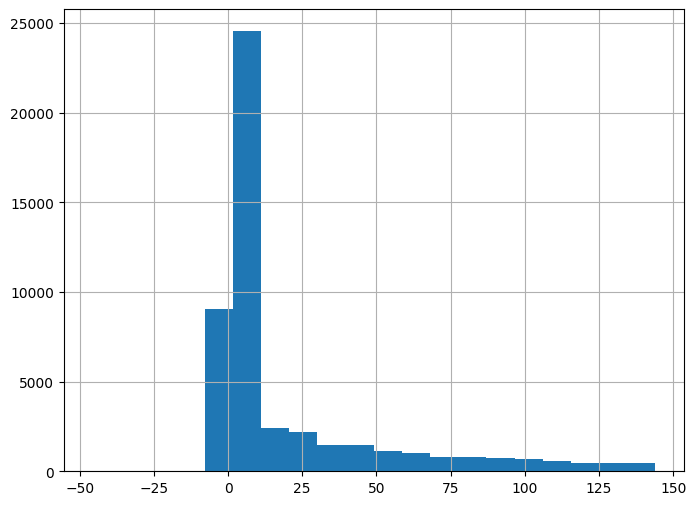

In [ ]:
diff_no_outliers_df.difference.hist(bins= 20, figsize=(8,6));

In [ ]:
normal_diff_list = list(diff_no_outliers_df["order_id"])

In [ ]:
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(normal_diff_list), :]
orderlines_qu = orderlines_qu.loc[orderlines["id_order"].isin(normal_diff_list), :]

In [ ]:
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(41549, 41549)

## Data Analysis

In [ ]:
products_cl.head(2)

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401


In [ ]:
orderlines.sample(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date
59967,1238694,351259,0,1,WAC0236,34.99,2017-04-30 12:58:48
208450,1508191,468203,0,1,APP2072,949.00,2017-12-20 18:10:48


In [ ]:
merged_pr_ol = products_cl.merge(
    orderlines,
    how="inner",
    on="sku"
)
merged_pr_ol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209500 entries, 0 to 209499
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sku               209500 non-null  object        
 1   name              209500 non-null  object        
 2   desc              209500 non-null  object        
 3   price             209500 non-null  float64       
 4   in_stock          209500 non-null  int64         
 5   type              209330 non-null  object        
 6   id                209500 non-null  int64         
 7   id_order          209500 non-null  int64         
 8   product_id        209500 non-null  int64         
 9   product_quantity  209500 non-null  int64         
 10  unit_price        209500 non-null  float64       
 11  date              209500 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 20.8+ MB


In [ ]:
maybe_diss = merged_pr_ol.groupby('sku')[['price', 'unit_price']].agg({ 'unit_price' : 'mean', 'price' : "mean"})
maybe_diss['disscount_avg'] = 1 - (maybe_diss['unit_price'] / maybe_diss['price'])
maybe_diss['disscount_avg'].describe()

count   6425.00
mean       0.21
std        0.18
min       -0.91
25%        0.09
50%        0.18
75%        0.29
max        1.00
Name: disscount_avg, dtype: float64

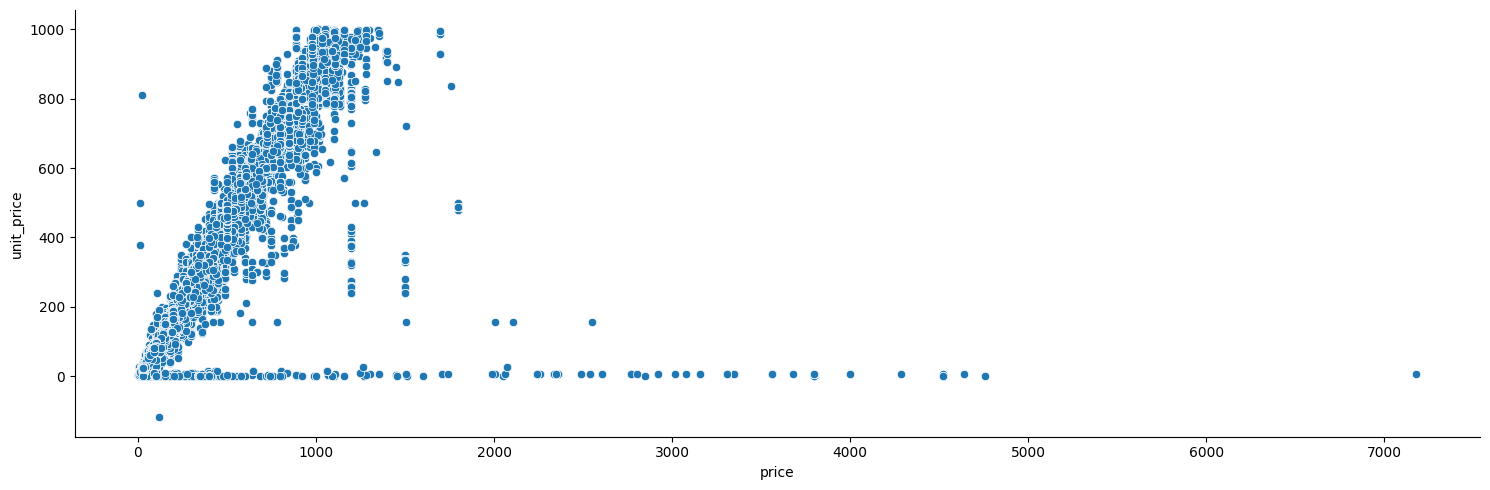

In [ ]:
import seaborn as sns

sns.relplot(
    data = merged_pr_ol,
            x="price",
            y="unit_price",
            aspect = 3
);

# Categories

- Computers
  - Laptop: *MacBook and Apple, Radeon (and PACK )*, Air, iMac, Radeon
    - Type: '1298', '1282', '1,02E+12', '2158'
  - Desktop : *Xeon, Server*
- Phones
  - IPhone
  - Samsung
- Tablets
  - Apple: *Ipad*
  - Other :*Tablet*
- Accessories
  - Phone Cases: *Survivor, Silicone,  Protector, OtterBox; LifeProof; Leather;  Folio; Hard Shell; Cover; Case*
  - Tablet Cases
  - Cables/Charging: *Cable*
  - Watch: *Strap*
- Components
  - Storage: *Western; Hard Drive; External; Aura*, SSD, HD, HDD
  - Other Components
- Imput and Output Devisec
  - Keyboard/Mouse: Keyboard, *Touch*
  - Audio: *Speaker; Headphones*
  - Monitor: *Monitor*
- Othres
  - Watch: *Watch*
  - *Adapter*


In [ ]:
brands_for_merge = brands.copy()
brands_for_merge

In [ ]:
products_for_merge = products_cl.copy()

In [ ]:
products_for_merge['short sku'] = products_for_merge['sku'].str[:3]
products_for_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sku        9986 non-null   object 
 1   name       9986 non-null   object 
 2   desc       9986 non-null   object 
 3   price      9986 non-null   float64
 4   in_stock   9986 non-null   int64  
 5   type       9940 non-null   object 
 6   short sku  9986 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 624.1+ KB


In [ ]:
#merging brands and products (copies), to filter with long names as well
top_30_types = brands_for_merge.merge(
    products_for_merge,
    how = "inner",
    left_on = "short",
    right_on = "short sku"
).copy()


In [ ]:
top_30_types.info(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 0 to 9799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   short      9800 non-null   object 
 1   long       9800 non-null   object 
 2   sku        9800 non-null   object 
 3   name       9800 non-null   object 
 4   desc       9800 non-null   object 
 5   price      9800 non-null   float64
 6   in_stock   9800 non-null   int64  
 7   type       9754 non-null   object 
 8   short sku  9800 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 765.6+ KB


In [ ]:
# create the column "category" in the Dataframe
top_30_types['category'] = ""

In [ ]:
# filter and assign the categories
top_30_types.loc[top_30_types["desc"].str.contains(r"Adapter", case=False), "category"] = "Adapter"
top_30_types.loc[top_30_types["desc"].str.contains(r"Strap | Watch strap", case=False), "category"] = "Strap"
top_30_types.loc[top_30_types["desc"].str.contains(r"Watch", case=False), "category"] = "Watch"
top_30_types.loc[top_30_types["desc"].str.contains(r"Keyboard | Mouse | digital pen | pointer | smart button | controller", case=False), "category"] = "Input device"
top_30_types.loc[top_30_types["desc"].str.contains(r"Speaker | Headphones | Headset | Amplifier", case=False), "category"] = "Output device"
top_30_types.loc[top_30_types["desc"].str.contains(r"Survivor | Silicone | Protector | Cover | Case", case=False), "category"] = "Case"
top_30_types.loc[top_30_types["desc"].str.contains(r"Cable | Charging", case=False), "category"] = "Cables"
top_30_types.loc[top_30_types["desc"].str.contains(r"imac|imac mini|imac pro | support | installation", case=False), "category"] = "Service"
top_30_types.loc[top_30_types["desc"].str.contains(r"Apple ipad", case=False), "category"] = "iPad"
top_30_types.loc[top_30_types["desc"].str.contains(r"Apple iphone", case=False), "category"] = "iPad"
top_30_types.loc[top_30_types["name"].str.contains(r"Memory", case=False), "category"] = "Ram"
top_30_types.loc[
    (top_30_types['long'].str.contains("Apple", case=False)) &
    (
        (top_30_types['desc'].str.contains("iphone", case=False)) |
        (top_30_types['name'].str.contains("iphone", case=False))
    ) &
    (top_30_types.price > 400),
    'category'
] = "IPhone"

top_30_types.loc[
    ((top_30_types.long.str.contains('Sonnet|QNAP|Synology|Apple', case=False))  &~
             (((top_30_types.desc.str.contains('MacBook | Air', case=False)))|
              ((top_30_types.name.str.contains('MacBook | Air', case=False)))))&
               (top_30_types.price > 400),
    'category'
] = "Desktop"

top_30_types.loc[
    ((top_30_types.long.str.contains('Sonnet|QNAP|Synology|Apple', case=False))  &
             (((top_30_types.desc.str.contains('MacBook | Air', case=False)))|
              ((top_30_types.name.str.contains('MacBook | Air', case=False)))))&
               (top_30_types.price > 460),
    'category'
] = "Apple Laptop"

top_30_types.loc[((top_30_types.desc.str.contains('Cable | Charging | charger' , case=False)) |
                top_30_types.name.str.contains('Cable | Charging | charger' , case=False)) &
                (top_30_types.price < 148), 'category'] = "Cable/Charging"

top_30_types.loc[
    ((top_30_types.desc.str.contains('Survivor | Silicone | Protector | Cover | Case' , case=False)) |
                top_30_types.name.str.contains('Survivor | Silicone | Protector | Cover | Case' , case=False)) &
                (top_30_types.price < 200),
    'category'
] = "Case"

top_30_types.loc[(top_30_types.desc.str.contains('External | hard drive | SSD | HDD' , case=False) &
              (top_30_types.price < 1000) &~
               (top_30_types.long.str.contains('pack', case=False))), 'category'] = "Hard Drive"


top_30_types.loc[((top_30_types.desc.str.contains('Monitor', case=False)) &
              (top_30_types.desc.str.contains('"'))) |
               ((top_30_types.name.str.contains('Monitor', case=False)) |
               (top_30_types.name.str.contains('inch'))), 'category'] = "Monitor"


top_30_types.loc[(top_30_types.long.str.contains(r'Pack', case=False)), "category"] = "PACK"

top_30_types.loc[top_30_types["long"].str.contains(r"Rep", case=False), "category"] = "Rep"

top_30_types.loc[(top_30_types["name"].str.contains(r"Tablet", case=False)), "category"] = "Tablet"

top_30_types.loc[top_30_types["name"].str.contains(r"server", case=False), "category"] = "Server"

top_30_types.loc[top_30_types["desc"].str.contains(r"Drone | Raid system | Base Station Dock | USB | HomeKit | Portable Printer | thermostat", case=False), "category"] = "Other devices"


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
top_30_types.loc[(top_30_types['category'] != "PACK") & (top_30_types['long'] == "Pack"), :].sample(10)

In [ ]:
top_30_types.loc[(top_30_types['category'] == "iMac"), :]

,short,long,sku,name,desc,price,in_stock,type,short sku,category


# Business Questions

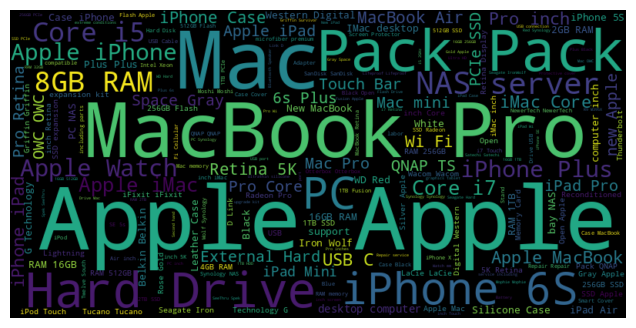

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenating all text data into a single string
text = ' '.join(top_30_types['desc']) + ' '.join(top_30_types['name']) + ' '.join(top_30_types['long'])

# Creating a WordCloud object and generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    colormap='viridis',
    contour_color='steelblue'
  ).generate(text)

# Displaying the word cloud using matplotlib
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
top_30_types.loc[top_30_types["price"] > 10000, :]['price']#.count()

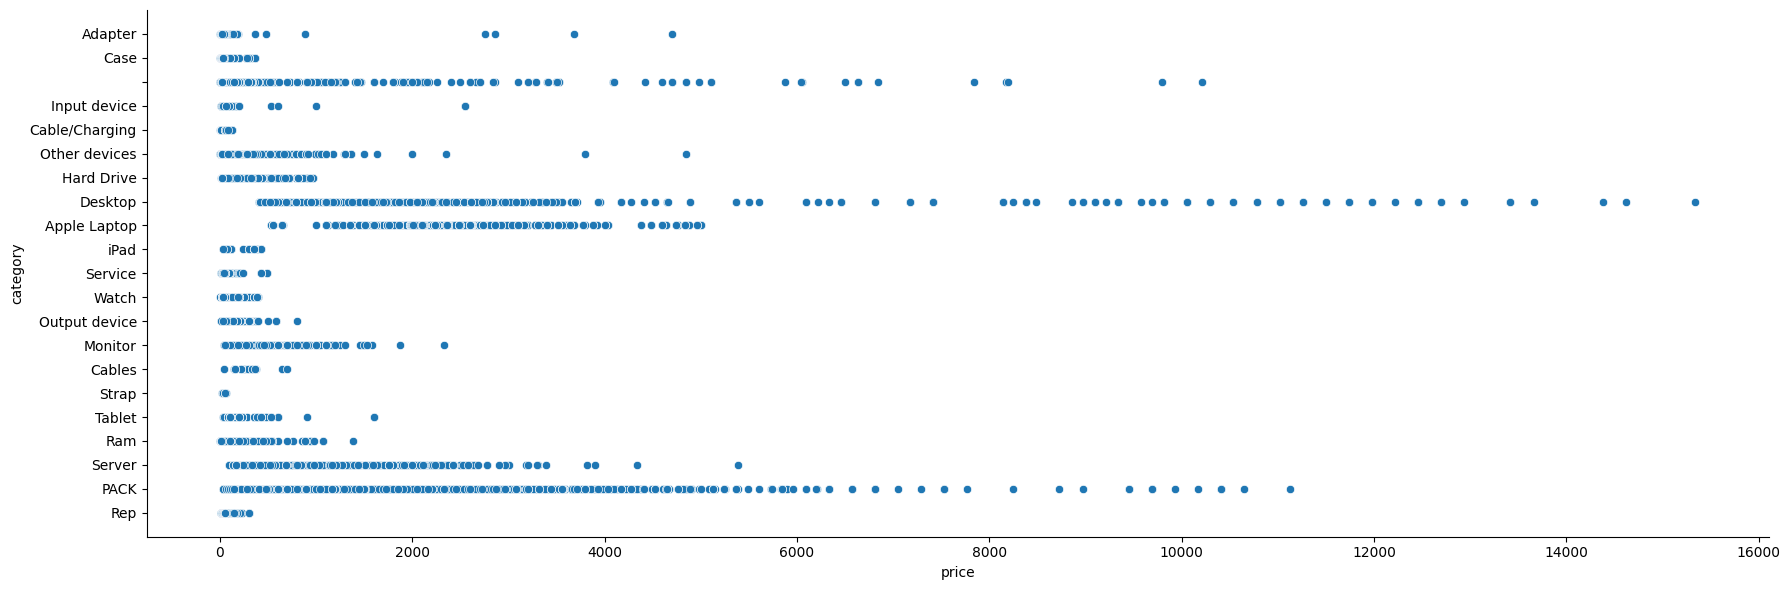

In [ ]:
sns.relplot(
    data = top_30_types,
    x = "price",
    y = 'category',
    height = 6,
    aspect = 3
);

In [ ]:
merged_top30_ol = top_30_types.merge(
    orderlines,
    how="inner",
    on="sku"
)
merged_top30_ol.info()

In [ ]:
maybe_diss = merged_top30_ol.groupby('category')[['price', 'unit_price']].agg({ 'unit_price' : 'mean', 'price' : "mean"})
maybe_diss['disscount_avg'] = 1 - (maybe_diss['unit_price'] / maybe_diss['price'])
maybe_diss['disscount_avg'].describe()

count   21.00
mean     0.17
std      0.09
min     -0.07
25%      0.14
50%      0.19
75%      0.20
max      0.37
Name: disscount_avg, dtype: float64

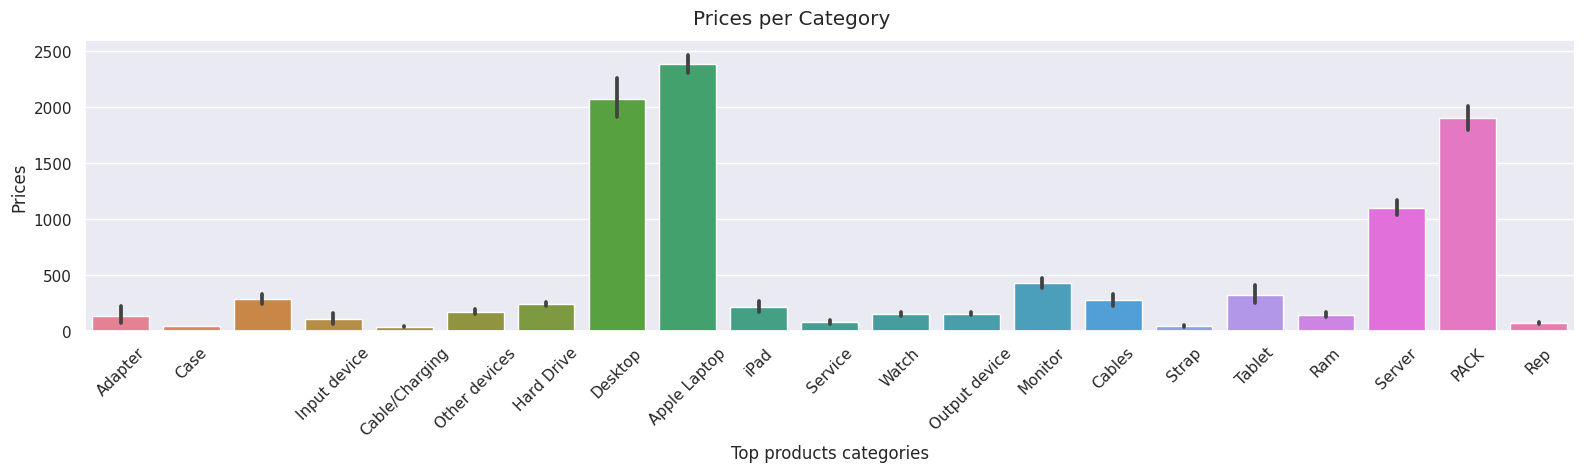

In [177]:
(
sns.catplot(kind="bar",
            data=top_30_types,
            x="category",
            y="price",
            height=4,
            aspect=4,
            palette="husl")
.set_axis_labels("Top products categories",
                     "Prices")
    .figure.suptitle("Prices per Category")
    .figure.subplots_adjust(top=.90)

)

plt.xticks(rotation=45)
plt.show()

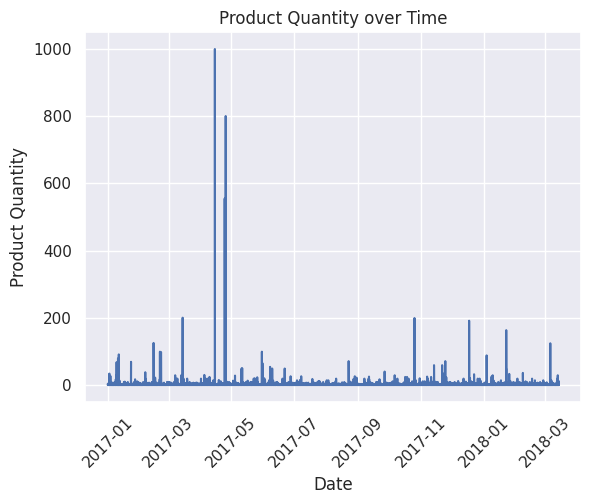

In [148]:
aggregated_data = merged_top30_ol.groupby("date")["product_quantity"].mean()
sns.lineplot(data=aggregated_data)
sns.set_style("darkgrid")
plt.xlabel("Date")
plt.ylabel("Product Quantity")
plt.title("Product Quantity over Time")
plt.xticks(rotation=45)
plt.show()

In [151]:
top_30_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 0 to 9799
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   short      9800 non-null   object 
 1   long       9800 non-null   object 
 2   sku        9800 non-null   object 
 3   name       9800 non-null   object 
 4   desc       9800 non-null   object 
 5   price      9800 non-null   float64
 6   in_stock   9800 non-null   int64  
 7   type       9754 non-null   object 
 8   short sku  9800 non-null   object 
 9   category   9800 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


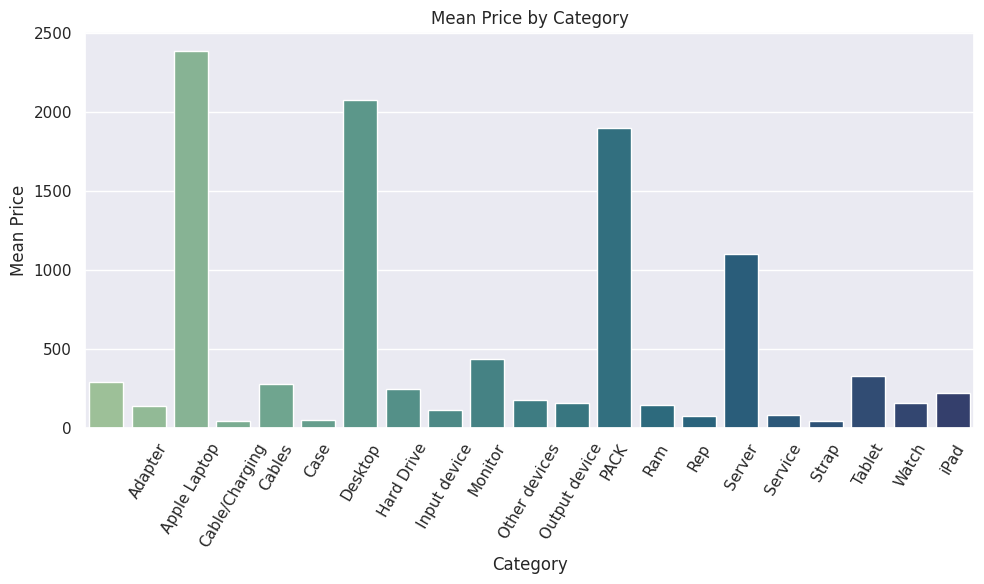

In [174]:
agg_data = top_30_types.groupby("category")["price"].mean()

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x=agg_data.index,
            y=agg_data, ax=ax, palette = "crest")
sns.set_style("darkgrid")
plt.xlabel("Category")
plt.ylabel("Mean Price")
plt.title("Mean Price by Category")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()